**Without Augmentation**

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
test_images.shape

(10000, 32, 32, 3)

In [ ]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Train the model without image augmentation
history_without_augmentation = model.fit(train_images, train_labels, epochs=10,
                                        validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.5537 - accuracy: 0.4327 - val_loss: 1.2619 - val_accuracy: 0.5440
Epoch 2/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.1723 - accuracy: 0.5847 - val_loss: 1.1387 - val_accuracy: 0.5969
Epoch 3/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.0214 - accuracy: 0.6414 - val_loss: 0.9695 - val_accuracy: 0.6585
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9257 - accuracy: 0.6762 - val_loss: 0.9893 - val_accuracy: 0.6538
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8453 - accuracy: 0.7043 - val_loss: 1.0029 - val_accuracy: 0.6526
Epoch 6/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7973 - accuracy: 0.7207 - val_loss: 0.8960 - val_accuracy: 0.6898
Epoch 7/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7481 - accuracy: 0.7363 - val_loss: 0.8732 -

In [ ]:
# Evaluate the model without image augmentation
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("\nTest Accuracy:", test_acc)

313/313 - 3s - loss: 0.8683 - accuracy: 0.7044 - 3s/epoch - 10ms/step

Test Accuracy: 0.7044000029563904


In [ ]:
# Generate predictions for the test set
predictions = model.predict(test_images)
predicted_labels = tf.argmax(predictions, axis=1)

313/313 [==============================] - 4s 12ms/step


In [ ]:
# Calculate and print confusion matrix, recall, precision, and F1 score
cm = confusion_matrix(test_labels, predicted_labels)
print("\nConfusion Matrix:\n", cm)
report = classification_report(test_labels, predicted_labels)
print("\nClassification Report:\n", report)


Confusion Matrix:
 [[779   9  47  32  16   1   8  14  61  33]
 [ 31 757   7  14   3   4   5   5  66 108]
 [ 68   4 600  88 105  38  40  40  12   5]
 [ 18   3  65 601 104  91  53  30  20  15]
 [ 19   4  65  62 731  13  29  65  10   2]
 [ 17   2  63 284  72 465  17  70   7   3]
 [  7   2  65  85  62  20 734  12   8   5]
 [ 25   1  36  58  80  36   4 747   5   8]
 [ 81  10  13  25   5   1   5   5 830  25]
 [ 41  55   7  23   6   6   4  17  41 800]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75      1000
           1       0.89      0.76      0.82      1000
           2       0.62      0.60      0.61      1000
           3       0.47      0.60      0.53      1000
           4       0.62      0.73      0.67      1000
           5       0.69      0.47      0.56      1000
           6       0.82      0.73      0.77      1000
           7       0.74      0.75      0.75      1000
           8       0.78      0.83    

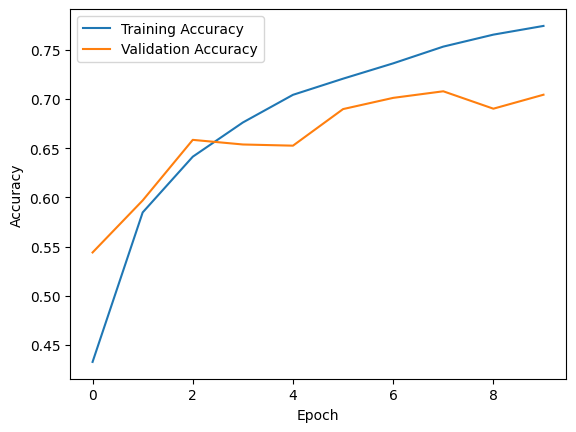

In [ ]:
# Visualize the training history to check for overfitting
plt.plot(history_without_augmentation.history['accuracy'], label='Training Accuracy')
plt.plot(history_without_augmentation.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**WITH AUGMENTATION**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator with augmentation configurations
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2
)

In [ ]:
# Apply image augmentation to the training set
augmented_train_data = datagen.flow(train_images, train_labels)

In [ ]:
# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Train the model with image augmentation
history_with_augmentation = model.fit(augmented_train_data, epochs=10,
                                      validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 95s 60ms/step - loss: 1.6580 - accuracy: 0.1166 - val_loss: 1.3785 - val_accuracy: 0.0776
Epoch 2/10
1563/1563 [==============================] - 91s 58ms/step - loss: 1.3686 - accuracy: 0.0971 - val_loss: 1.2452 - val_accuracy: 0.0705
Epoch 3/10
1563/1563 [==============================] - 92s 59ms/step - loss: 1.2522 - accuracy: 0.0978 - val_loss: 1.1118 - val_accuracy: 0.0829
Epoch 4/10
1563/1563 [==============================] - 93s 60ms/step - loss: 1.1689 - accuracy: 0.0979 - val_loss: 1.0336 - val_accuracy: 0.0805
Epoch 5/10
1563/1563 [==============================] - 90s 58ms/step - loss: 1.1149 - accuracy: 0.0984 - val_loss: 1.0009 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 93s 60ms/step - loss: 1.0674 - accuracy: 0.0995 - val_loss: 0.9485 - val_accuracy: 0.0836
Epoch 7/10
1563/1563 [==============================] - 92s 59ms/step - loss: 1.0394 - accuracy: 0.0978 - val_loss: 0.9033 -

In [ ]:
# Evaluate the model with image augmentation
test_loss_aug, test_acc_aug = model.evaluate(test_images,  test_labels, verbose=2)
print("\nTest Accuracy with Augmentation:", test_acc_aug)

313/313 - 5s - loss: 0.9638 - accuracy: 0.1041 - 5s/epoch - 15ms/step

Test Accuracy with Augmentation: 0.10409999638795853


In [ ]:
# Generate predictions for the test set with image augmentation
predictions_aug = model.predict(test_images)
predicted_labels_aug = tf.argmax(predictions_aug, axis=1)

313/313 [==============================] - 3s 11ms/step


In [ ]:
# Calculate and print confusion matrix, recall, precision, and F1 score with image augmentation
cm_aug = confusion_matrix(test_labels, predicted_labels_aug)
print("\nConfusion Matrix with Augmentation:\n", cm_aug)

report_aug = classification_report(test_labels, predicted_labels_aug)
print("\nClassification Report with Augmentation:\n", report_aug)


Confusion Matrix with Augmentation:
 [[756  43  22   7  12   6  24  17  46  67]
 [ 11 885   1   2   0   2  21   0   8  70]
 [ 97  12 422  45  55  68 246  36   8  11]
 [ 23  15  21 366  36 147 321  41  10  20]
 [ 26   7  36  36 424  21 327 106   9   8]
 [ 12   7  16 134  27 575 159  61   2   7]
 [  5   3   7  12   5  10 950   6   1   1]
 [ 16   9  17  25  34  53  65 758   3  20]
 [ 73  63   7   8   7   6  25  10 742  59]
 [ 22 108   5  10   6   4  33   8   9 795]]

Classification Report with Augmentation:
               precision    recall  f1-score   support

           0       0.73      0.76      0.74      1000
           1       0.77      0.89      0.82      1000
           2       0.76      0.42      0.54      1000
           3       0.57      0.37      0.44      1000
           4       0.70      0.42      0.53      1000
           5       0.64      0.57      0.61      1000
           6       0.44      0.95      0.60      1000
           7       0.73      0.76      0.74      1000
 

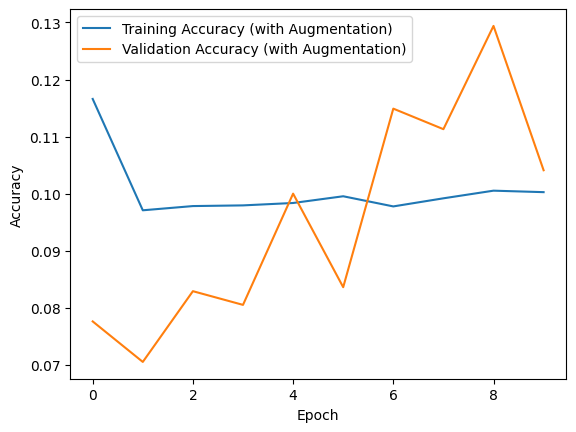

In [ ]:
# Visualize the training history with image augmentation
plt.plot(history_with_augmentation.history['accuracy'], label='Training Accuracy (with Augmentation)')
plt.plot(history_with_augmentation.history['val_accuracy'], label='Validation Accuracy (with Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()